In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
enc = OrdinalEncoder()

In [6]:
data[['cut','color','clarity']] = enc.fit_transform(data[['cut','color','clarity']])

In [7]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: xlabel='price', ylabel='carat'>

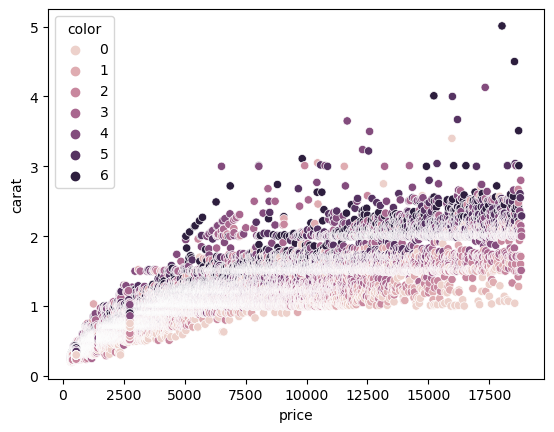

In [9]:
sns.scatterplot(data, x='price', y='carat',hue='color')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [11]:
X = data.drop('price', axis=1)

In [12]:
y = data['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.shape

(36139, 9)

In [15]:
X_test.shape

(17801, 9)

In [16]:
y_test.shape

(17801,)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
model = lr.predict(X_test)

In [20]:
model

array([ 366.4043569 , 3361.00618717, 2146.4157527 , ..., 3067.82249961,
        793.85622924, 2378.22637903])

In [21]:
model = pd.DataFrame(model, columns=['predictions'])

In [22]:
model

,predictions
0,366.404357
1,3361.006187
2,2146.415753
3,2376.675268
4,10545.727089
...,...
17796,183.706936
17797,7998.832748
17798,3067.822500
17799,793.856229


In [23]:
y_test = pd.DataFrame(y_test,columns=['price'])

In [24]:
X_test = pd.DataFrame(X_test, columns=['carat','cut','color','clarity','depth','table','x','y','z'])

In [25]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
1388,0.24,2.0,3.0,6.0,62.1,56.0,3.97,4.00,2.47
50052,0.58,4.0,2.0,7.0,60.0,57.0,5.44,5.42,3.26
41645,0.40,2.0,1.0,7.0,62.1,55.0,4.76,4.74,2.95
42377,0.43,3.0,1.0,7.0,60.8,57.0,4.92,4.89,2.98
17244,1.55,2.0,1.0,3.0,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...
31474,0.34,3.0,4.0,4.0,61.3,56.0,4.53,4.48,2.76
22112,1.24,2.0,2.0,4.0,60.9,54.0,6.98,6.95,4.24
134,0.77,4.0,4.0,4.0,61.3,60.0,5.88,5.90,3.61
31314,0.32,2.0,1.0,4.0,61.7,56.0,4.39,4.42,2.72


In [26]:
data_new = pd.concat([X_test.reset_index(),y_test.reset_index(),model.reset_index()], axis=1)

In [27]:
data_new.shape

(17801, 14)

In [28]:
data_new

,index,carat,cut,color,clarity,depth,table,x,y,z,index,price,index,predictions
0,1388,0.24,2.0,3.0,6.0,62.1,56.0,3.97,4.00,2.47,1388,559,0,366.404357
1,50052,0.58,4.0,2.0,7.0,60.0,57.0,5.44,5.42,3.26,50052,2201,1,3361.006187
2,41645,0.40,2.0,1.0,7.0,62.1,55.0,4.76,4.74,2.95,41645,1238,2,2146.415753
3,42377,0.43,3.0,1.0,7.0,60.8,57.0,4.92,4.89,2.98,42377,1304,3,2376.675268
4,17244,1.55,2.0,1.0,3.0,62.3,55.0,7.44,7.37,4.61,17244,6901,4,10545.727089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17796,31474,0.34,3.0,4.0,4.0,61.3,56.0,4.53,4.48,2.76,31474,765,17796,183.706936
17797,22112,1.24,2.0,2.0,4.0,60.9,54.0,6.98,6.95,4.24,22112,10138,17797,7998.832748
17798,134,0.77,4.0,4.0,4.0,61.3,60.0,5.88,5.90,3.61,134,2765,17798,3067.822500
17799,31314,0.32,2.0,1.0,4.0,61.7,56.0,4.39,4.42,2.72,31314,758,17799,793.856229


In [29]:
lr.score(X_test,y_test)

0.8857101127406888

In [30]:
lr.intercept_

15953.527348590422

In [31]:
lr.coef_

array([ 1.09459425e+04,  7.10667833e+01, -2.67750845e+02,  2.86684897e+02,
       -1.53240185e+02, -9.46092668e+01, -1.13444287e+03,  1.76091212e+01,
       -1.03252799e+01])

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=1).fit_transform(X_test)

In [34]:
pca.shape

(17801, 1)

Text(0, 0.5, 'Price')

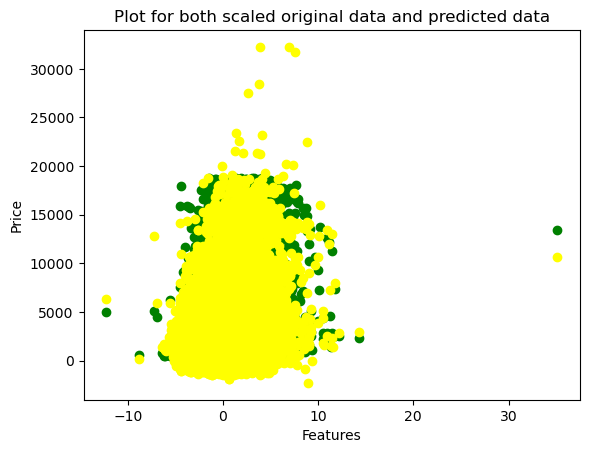

In [35]:
plt.scatter(x=pca, y=data_new['price'], c='green')
plt.scatter(x=pca, y=data_new['predictions'], c='yellow')
plt.title('Plot for both scaled original data and predicted data')
plt.xlabel('Features')
plt.ylabel('Price')

In [36]:
# The above model didn't perform so well, the below did so well

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
pipe = Pipeline([('scaler',StandardScaler()),('model', MLPRegressor(hidden_layer_sizes=20,activation='relu',solver='adam',alpha=10,learning_rate_init=0.01,max_iter=200))])

In [40]:
pipe.fit(X_train, y_train)

/home/lenovo/yes/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPRegressor(alpha=10, hidden_layer_sizes=20,
                              learning_rate_init=0.01))])

In [41]:
pipe.score(X_test,y_test)

0.9333988709629453

In [42]:
model_pipe = pipe.predict(X_test)

In [43]:
model_pipe

array([ 585.00403548, 2716.02668548, 1316.5260849 , ..., 2705.0423727 ,
        641.78557054, 1498.5345625 ])

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca_pipe = PCA(n_components=1).fit_transform(X_test)

In [46]:
pca_pipe.shape

(17801, 1)

Text(0, 0.5, 'Price')

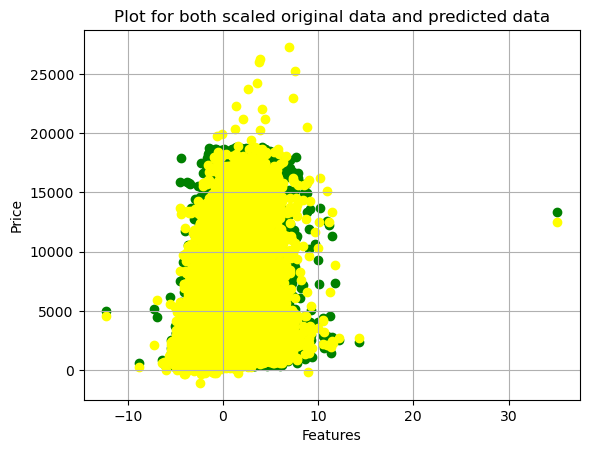

In [47]:
plt.scatter(x=pca_pipe, y=y_test, c='green')
plt.scatter(x=pca_pipe, y=model_pipe, c='yellow')
plt.title('Plot for both scaled original data and predicted data')
plt.grid(True)
plt.xlabel('Features')
plt.ylabel('Price')

In [48]:
import plotly.express as px

In [49]:
model_pipe  = pd.DataFrame(model_pipe,columns=['pred'])

In [50]:
y_test = pd.DataFrame(y_test, columns=['price'])

In [64]:
X_test = pd.DataFrame(X_test,columns=['carat','cut','color','clarity','depth','table','x','y','z'])

In [81]:
cn_data = pd.concat([X_test.reset_index(),y_test.reset_index(),model_pipe.reset_index()],axis=1)

In [85]:
cn_data.drop(['index','index'],axis=1,inplace=True)

In [86]:
cn_data

,carat,cut,color,clarity,depth,table,x,y,z,price,pred
0,0.24,2.0,3.0,6.0,62.1,56.0,3.97,4.00,2.47,559,585.004035
1,0.58,4.0,2.0,7.0,60.0,57.0,5.44,5.42,3.26,2201,2716.026685
2,0.40,2.0,1.0,7.0,62.1,55.0,4.76,4.74,2.95,1238,1316.526085
3,0.43,3.0,1.0,7.0,60.8,57.0,4.92,4.89,2.98,1304,1196.976522
4,1.55,2.0,1.0,3.0,62.3,55.0,7.44,7.37,4.61,6901,11925.284504
...,...,...,...,...,...,...,...,...,...,...,...
17796,0.34,3.0,4.0,4.0,61.3,56.0,4.53,4.48,2.76,765,620.328936
17797,1.24,2.0,2.0,4.0,60.9,54.0,6.98,6.95,4.24,10138,9145.578196
17798,0.77,4.0,4.0,4.0,61.3,60.0,5.88,5.90,3.61,2765,2705.042373
17799,0.32,2.0,1.0,4.0,61.7,56.0,4.39,4.42,2.72,758,641.785571


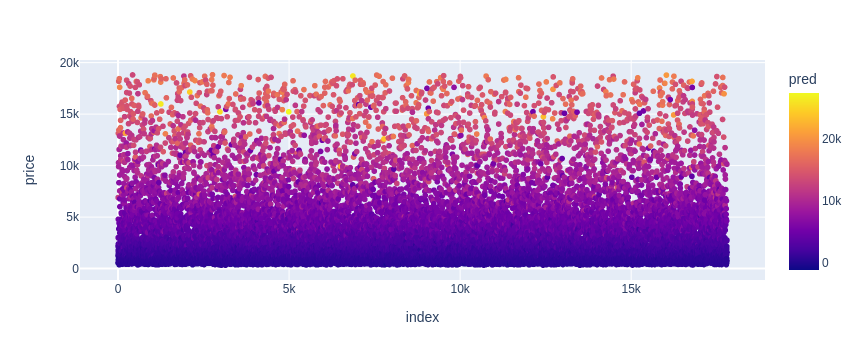

In [94]:
px.scatter(data_frame=cn_data,y=cn_data['price'],color=cn_data['pred'],hover_data=['carat','cut','color','clarity'])